# Image Data Augmentation
To help improve my object detection models I thought it would be good to apply data augmentation on the files I have to increase my training and testing samples to be more robust.

The below function randomly applies transformations on a image to create unique transformations of the original. Transformations can include flipping the image along the vertical, rotating the image, darken the image slightly, crop the image. These transformations are randomly turned on and off. Atleast one transformation will always be run.

In [356]:
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
from scipy import ndimage
from scipy import misc
import os
import glob

In [362]:
def augmentme(outpath = os.getcwd(), inpath = os.getcwd(), auglevel = 3):
    '''randomly applies transformations on a image to create unique transformations of the original. 
    Transformations can include flipping the image along the vertical, rotating the image, 
    darken the image slightly, crop the image. These transformations are randomly turned on and off. 
    Atleast one transformation will always be run.
    
    Parameters:
    outpath (str): path to output folder for images.
    inpath (str): path to input folde for images.
    auglevel (int): Number of transformed images produced from each image.

    Returns:
    Writes files to outpath numbered 0 to n total files.
    
    '''
    rlist = [10, 12, 15, 20, 350, 347, 345, 350]
    glist = [0.3, 0.4, 0.5]
    rnum = [0,1]
    def adjust_gamma(image, gamma=1.0):
       invGamma = 1.0 / gamma
       table = np.array([((i / 255.0) ** invGamma) * 255
          for i in np.arange(0, 256)]).astype("uint8")
       return cv2.LUT(image, table)
    cv_img = []
    for img in glob.glob(inpath+"*.jpg"):
        img = cv2.imread(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (800, 600), interpolation = cv2.INTER_AREA)
        print('Original')
        plt.imshow(img)
        plt.show()
        for i in range(auglevel):
            clist= [random.choice(rnum), random.choice(rnum), random.choice(rnum), random.choice(rnum)]
            if sum(clist) == 0: clist = [1, 1, 1, 1]
            img1 = img.copy()
            if clist[0] == 1: img1 = np.fliplr(img1)
            if clist[1] == 1: img1 = ndimage.rotate(img1, random.choice(rlist), reshape=True, mode = 'nearest')
            if clist[2] == 1: img1 = adjust_gamma(img1, gamma=random.choice(glist))
            if clist[3] == 1: img1 = cv2.resize(img1[20:780, 10:590],(800, 600), interpolation = cv2.INTER_AREA)
            cv_img.append(img1)
    c0=0
    for i in cv_img:
        cv2.imwrite(outpath+str(c0)+'.jpg', cv2.cvtColor(i, cv2.COLOR_RGB2BGR))
        c0=c0+1
        print('Transformation '+str(c0))
        plt.imshow(i)
        plt.show()


Original


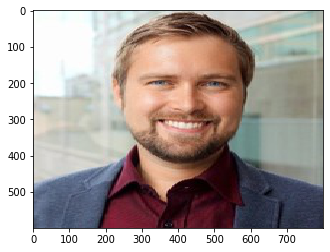

Transformation 1


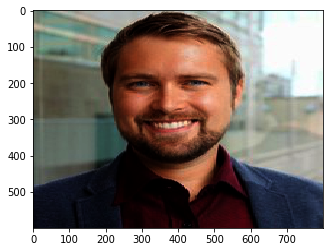

Transformation 2


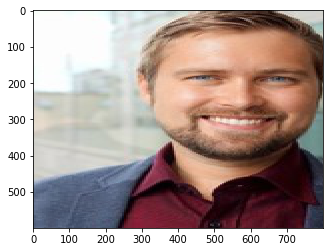

Transformation 3


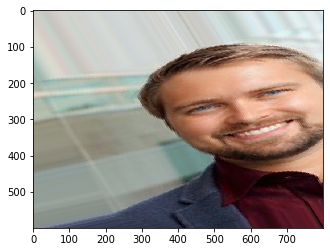

In [363]:
inpath = 'C:\\Users\\PRESTK\\Pictures\\'
outpath = 'C:\\Users\\PRESTK\\Pictures\\out\\'
auglevel = 3

augmentme(outpath, inpath, auglevel = 3)